<h1>C964 Capstone Project</h1>

In [4]:
import pandas as pd
import numpy as np
import ipywidgets as widget
import os
import glob
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [5]:
path = os.getcwd()
csvfiles = glob.glob(os.path.join(path, "data/*.csv"))

df = None
def dropdownFunc(Stock):
    for file in csvfiles:
        if Stock in file:
            return file

dropdown = widget.interactive(dropdownFunc, Stock=['AAPL', 'AMD', 'AMZN', 'ATVI', 'BABA', 'BAC', 'CRM', 'CSCO', 'DIS', 'EA', 'F', 'GOOG', 'INTC', 'JPM', 'KO', 'MCD', 'META', 'MSFT', 'MTCH', 'NFLX', 'NVDA', 'PFE', 'PYPL', 'T', 'TSLA','TTD','WMT','XOM','YELP','ZG'])
display(dropdown)

interactive(children=(Dropdown(description='Stock', options=('AAPL', 'AMD', 'AMZN', 'ATVI', 'BABA', 'BAC', 'CR…

<p style="font-size: larger">Use the combo box above to select the stock you are interested in analyzing.


</p>

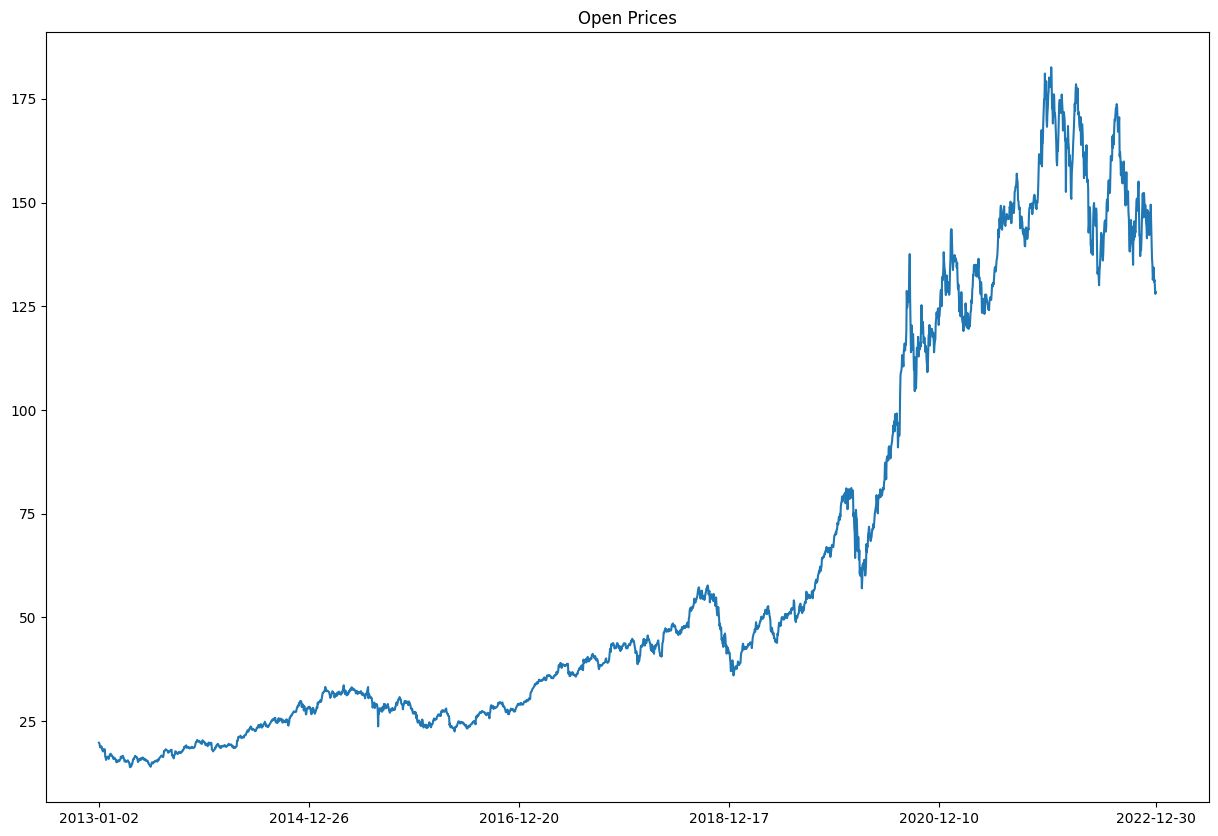

In [6]:

df = pd.read_csv(dropdown.result)
df.head()
openValues = df.Open
dates = df.Date
plt.figure(figsize=(15,10))
plt.plot(dates, df.Open)
plt.xticks([0, 500, 1000, 1500, 2000, 2517])
plt.title("Open Prices")
plt.savefig("open_prices.jpg")
plt.show()
plt.close()



Above we simply plotted the open prices of the stock. Below we will split the data into our training data and our test data.

In [ ]:

training_data = df[:2265]
test_data = df[2265:]

open_training = training_data.iloc[:,1:2].values
open_test = test_data.iloc[:,1:2].values

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled= sc.fit_transform(open_training)

x_train = []
y_train = []

for i in range (60,2265):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

[[ 19.779285]
 [ 19.567142]
 [ 19.1775  ]
 ...
 [177.089996]
 [180.160004]
 [179.330002]]
(2205, 60, 1)
(2205,)


In [14]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
69/69 [==============================] - 17s 132ms/step - loss: 0.0096
Epoch 2/100
38/69 [===============>..............] - ETA: 3s - loss: 0.0025

KeyboardInterrupt: 

In [15]:
full_dataset = pd.concat((training_data["Open"],test_data["Open"]), axis=0)

dates = test_data.Date
inputs = full_dataset[len(full_dataset)-len(test_data)-60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []

for i in range (60,313):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_prices = regressor.predict(x_test)
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

8/8 [==============================] - 2s 29ms/step


| 2021-12-30 |  [170.40553]   |  [179.470001]  |
| 2021-12-31 |  [170.78697]   |  [178.089996]  |
| 2022-01-03 |  [170.87048]   |  [177.830002]  |
| 2022-01-04 |  [170.80585]   |  [182.630005]  |
| 2022-01-05 |   [171.3565]   |  [179.610001]  |
| 2022-01-06 |  [171.65878]   |  [172.699997]  |
| 2022-01-07 |  [170.93462]   |  [172.889999]  |
| 2022-01-10 |  [170.02927]   |  [169.080002]  |
| 2022-01-11 |  [168.70108]   |  [172.320007]  |
| 2022-01-12 |  [167.81857]   |  [176.119995]  |
| 2022-01-13 |  [167.73215]   |  [175.779999]  |
| 2022-01-14 |  [167.84402]   |  [171.339996]  |
| 2022-01-18 |   [167.369]    |  [171.509995]  |
| 2022-01-19 |  [166.78465]   |     [170.]     |
| 2022-01-20 |  [166.06985]   |  [166.979996]  |
| 2022-01-21 |  [165.03189]   |  [164.419998]  |
| 2022-01-24 |   [163.6671]   |  [160.020004]  |
| 2022-01-25 |  [161.75912]   |  [158.979996]  |
| 2022-01-26 |  [159.72821]   |    [163.5]     |
| 2022-01-27 |  [158.57661]   |  [162.449997]  |
| 2022-01-28 |  [157

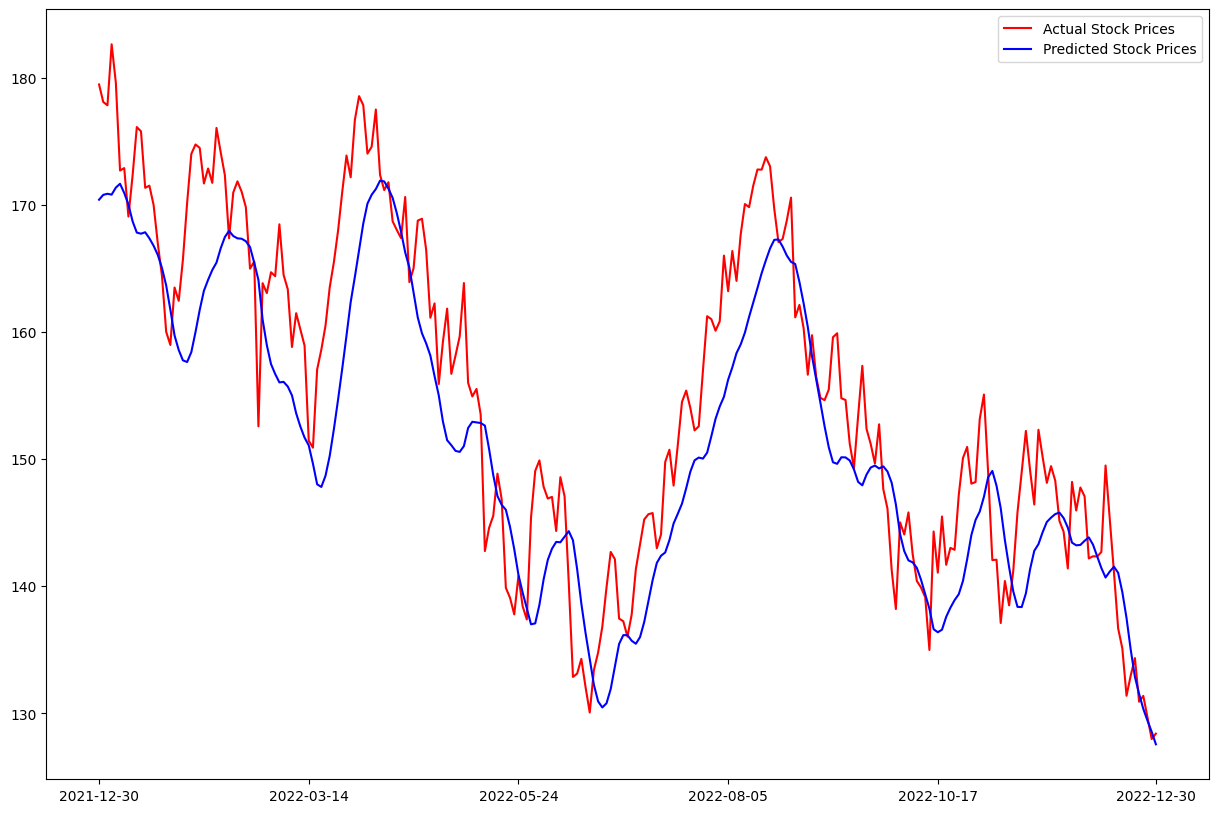

In [10]:
actual_stock_prices = test_data.iloc[:,1:2].values

plt.figure(figsize=(15,10))
plt.plot(dates, actual_stock_prices, color='red', label = "Actual Stock Prices")
plt.plot(dates, predicted_stock_prices, color='blue', label = "Predicted Stock Prices")
plt.xticks([0, 50, 100, 150, 200, 252])
plt.legend()

fmt = '| {:6s} | {:^14} | {:^14} |'
for date,predicted,actual in zip(dates.values,predicted_stock_prices,actual_stock_prices):
    print(fmt.format(str(date), str(predicted), str(actual)))
    

